# Introduction to Scikit-Learn(sklearn )

This notebook dempstrates some of the most useful functions of the beutibul Scikit-Learn library

What we're going to cover :

0. An end-to-end Scikit-Learn workflow
1. Getting the data ready
2. Choose the right estimator/algorithm for our problems
3. Fit the model/algorithm and use it to make predictions on our data
4. Evaluating a model
5. Improve a model
6. Save and load a trained model
7. Putting it all together !

| **Aspect**                 | **Classifier**                                          | **Regressor**                                                 |
| -------------------------- | ------------------------------------------------------- | ------------------------------------------------------------- |
| **What it predicts?**      | **Categories / Labels** (Yes/No, 0/1, A/B/C)            | **Numbers / Continuous values** (e.g., 45.3)                  |
| **Examples of Output**     | “Spam” or “Not Spam” <br> “Has Disease” or “No Disease” | Price of a house (₹45,00,000) <br> Temperature (30.5°C)       |
| **Target (y) type**        | Categorical (discrete values)                           | Numerical (continuous values)                                 |
| **Examples of Algorithms** | Logistic Regression, RandomForestClassifier, SVM        | Linear Regression, RandomForestRegressor, XGBoost Regressor   |


## 0.An end-to-end Scikit-Learn workflow

In [3]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
# 1. Get the data ready
import pandas as pd
heart_disease = pd.read_csv('heart-disease.csv')
heart_disease

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [5]:

# Create X (features matrix)
x = heart_disease.drop('target', axis = 1) # it has all columns excepecct target column

# Create y (labels)
y = heart_disease['target']  # it has target column except all columns

In [6]:
# 2. Choose the right model and hyperparameters
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()

# we'll keep the defauli hyperparameiers
# clf.get_params()

In [7]:
# 3. Fit the model to the training data
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

In [8]:
clf.fit(x_train, y_train);

In [9]:
x_test

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
74,43,0,2,122,213,0,1,165,0,0.2,1,0,2
110,64,0,0,180,325,0,1,154,1,0.0,2,0,2
11,48,0,2,130,275,0,1,139,0,0.2,2,0,2
265,66,1,0,112,212,0,0,132,1,0.1,2,1,2
40,51,0,2,140,308,0,0,142,0,1.5,2,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
241,59,0,0,174,249,0,1,143,1,0.0,1,0,2
246,56,0,0,134,409,0,0,150,1,1.9,1,2,3
129,74,0,1,120,269,0,0,121,1,0.2,2,1,2
251,43,1,0,132,247,1,0,143,1,0.1,1,4,3


In [10]:
x_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
70,54,1,2,120,258,0,0,147,0,0.4,1,0,3
177,64,1,2,140,335,0,1,158,0,0.0,2,0,2
132,42,1,1,120,295,0,1,162,0,0.0,2,0,2
173,58,1,2,132,224,0,0,173,0,3.2,2,2,3
194,60,1,2,140,185,0,0,155,0,3.0,1,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
112,64,0,2,140,313,0,1,133,0,0.2,2,0,3
67,45,0,1,130,234,0,0,175,0,0.6,1,0,2
159,56,1,1,130,221,0,0,163,0,0.0,2,0,3
120,64,0,0,130,303,0,1,122,0,2.0,1,2,2


In [11]:
y_test.head()

74     1
110    1
11     1
265    0
40     1
Name: target, dtype: int64

In [12]:
y_train.head()

70     1
177    0
132    1
173    0
194    0
Name: target, dtype: int64

### predict()
* This tells the model to make predictions on the test data (X_test).
* It uses what it learned during training (patterns between input features and target) to guess the class for each sample in the test dataset.

In [13]:
y_preds = clf.predict(x_test)
y_preds

array([1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1])

Means:
* First person → predicted as 1 (disease)
* Second person → predicted as 0 (no disease)
And so on...

In [14]:
y_test

74     1
110    1
11     1
265    0
40     1
      ..
241    0
246    0
129    1
251    0
83     1
Name: target, Length: 61, dtype: int64

### score()
* Returns a score (by default: Accuracy for classifiers)
  
* Why check training score?
* > To see how well the model learned the training data
* > High training score but low testing score → Overfitting
* > Both training and testing score similar and good → Good model


In [15]:
# 4. Evaluate the model on the training datta and test data
clf.score(x_train, y_train)

1.0

In [16]:
clf.score(x_test, y_test)

0.819672131147541

* ##### Our training score is 1.0 & testing score is 0.78 
* ##### our model get over fitted (Overfitting) 

In [17]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.79      0.87      0.83        30
           1       0.86      0.77      0.81        31

    accuracy                           0.82        61
   macro avg       0.82      0.82      0.82        61
weighted avg       0.82      0.82      0.82        61



### To read < classification_report >
* **Class 0 (e.g., "No Disease")**
>Precision = 0.79 → Out of all predictions as "No Disease", 79% were correct.
>Recall = 0.87 → Out of actual "No Disease" cases, 87% were correctly predicted.
>F1-score = 0.83 → Balance between precision & recall (pretty good).

* **Class 1 (e.g., "Has Disease")**
>Precision = 0.86 → Out of all predictions as "Has Disease", 86% were correct.
>Recall = 0.77 → Out of actual "Has Disease" cases, 77% were caught.
>F1-score = 0.81 → Good balance, but recall is a bit lower than precision.

* **Overall Metrics**
>Accuracy = 0.82 (82%) → Out of 61 samples, ~50 were correctly predicted.
>Macro avg = 0.82 → Treats both classes equally.
>Weighted avg = 0.82 → Adjusts for class imbalance (since support is slightly different: 30 vs 31).

In [21]:
confusion_matrix(y_test, y_preds)

array([[26,  4],
       [ 7, 24]])

### The confusion matrix shows where the model is correct and where it is wrong.
What it returns (for binary classification)?
* It gives a 2x2 matrix:

[ 
[TN
FP]
​

  
[FN
TP]
​
 ]
* **Where:**
* >TN (True Negative) → Correctly predicted class 0
* >FP (False Positive) → Predicted class 1 but actually class 0 (wrong)
* >FN (False Negative) → Predicted class 0 but actually class 1 (missed positives)
* >TP (True Positive) → Correctly predicted class 1



In [24]:
accuracy_score(y_test, y_preds)

0.819672131147541

* **n_estimators()**
>Number of trees in the Random Forest.
>More trees → usually more stable & accurate, but also slower.

* **Loop (10 to 90)**
>Trains different models with 10, 20, 30… 90 trees.
>Prints test accuracy for each.

* **Purpose**
>To check how model accuracy changes as the number of trees increases.
>Helps find sweet spot (enough trees for good accuracy but not too heavy).

In [15]:
# 5.improve a model
# Tryy different amount of n_estimators
np.random.seed(42)
for i in range(10, 100, 10):
    print(f"Trying model with {i} estimators...")
    clf = RandomForestClassifier(n_estimators = i).fit(x_train, y_train)
    print(f"Model accuracy on test set:{clf.score(x_test, y_test) * 100:.2f}")
    print(' ')

Trying model with 10 estimators...
Model accuracy on test set:81.97
 
Trying model with 20 estimators...
Model accuracy on test set:80.33
 
Trying model with 30 estimators...
Model accuracy on test set:81.97
 
Trying model with 40 estimators...
Model accuracy on test set:77.05
 
Trying model with 50 estimators...
Model accuracy on test set:78.69
 
Trying model with 60 estimators...
Model accuracy on test set:73.77
 
Trying model with 70 estimators...
Model accuracy on test set:78.69
 
Trying model with 80 estimators...
Model accuracy on test set:80.33
 
Trying model with 90 estimators...
Model accuracy on test set:77.05
 


#### To save the model....and..Load

In [27]:
# 6.  To Save a model and load it
# wb : read binary mode
import pickle

pickle.dump(clf, open('random_forest_model_1.pkl', 'wb'))

In [28]:
# Loading the model
loaded_model = pickle.load(open('random_forest_model_1.pkl', 'rb'))
loaded_model.score(x_test, y_test)

0.819672131147541

In [18]:
import sklearn
sklearn.show_versions()


System:
    python: 3.13.5 | packaged by Anaconda, Inc. | (main, Jun 12 2025, 16:37:03) [MSC v.1929 64 bit (AMD64)]
executable: C:\Users\sujal warghe\Desktop\sample_project_1\env\python.exe
   machine: Windows-11-10.0.26100-SP0

Python dependencies:
      sklearn: 1.7.0
          pip: 25.1
   setuptools: 72.1.0
        numpy: 2.2.5
        scipy: 1.16.0
       Cython: None
       pandas: 2.2.3
   matplotlib: 3.10.0
       joblib: 1.5.1
threadpoolctl: 3.6.0

Built with OpenMP: True

threadpoolctl info:
       user_api: blas
   internal_api: mkl
    num_threads: 4
         prefix: mkl_rt
       filepath: C:\Users\sujal warghe\Desktop\sample_project_1\env\Library\bin\mkl_rt.2.dll
        version: 2023.1-Product
threading_layer: intel

       user_api: openmp
   internal_api: openmp
    num_threads: 8
         prefix: vcomp
       filepath: C:\Users\sujal warghe\Desktop\sample_project_1\env\Lib\site-packages\sklearn\.libs\vcomp140.dll
        version: None

       user_api: blas
   intern

## 1. Getting our data ready to be used with machine learning

Three main things we have to do :

1. Split the data into features and labels (usually 'x' & 'y')
2. Filling (also called imputing) or disregarding missing values
3. Converting non-numerical values to numeerical values (also called features encoding)

In [30]:
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [31]:
x = heart_disease.drop(['target'], axis = 1 )
x.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [32]:
y = heart_disease['target']
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [33]:
# Split the data into training and test sets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

In [34]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((242, 13), (61, 13), (242,), (61,))

In [24]:
x.shape[0] * 0.8

242.4

## 1.1 Make sure it's all numerical

In [1]:
import pandas as pd

In [3]:
car_sales = pd.read_csv('car-sales-extended.csv')
car_sales

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431,4,15323
1,BMW,Blue,192714,5,19943
2,Honda,White,84714,4,28343
3,Toyota,White,154365,4,13434
4,Nissan,Blue,181577,3,14043
...,...,...,...,...,...
995,Toyota,Black,35820,4,32042
996,Nissan,White,155144,3,5716
997,Nissan,Blue,66604,4,31570
998,Honda,White,215883,4,4001


In [4]:
len(car_sales)

1000

In [5]:
car_sales.dtypes

Make             object
Colour           object
Odometer (KM)     int64
Doors             int64
Price             int64
dtype: object

In [6]:
# Split the data into training and test sets
from sklearn.model_selection import train_test_split

In [7]:
# Here we are predicting price of caar from the data
# so our X is excluding price column because we have to predict the price
# here we have to use X to predict y
# Split into X/y
X = car_sales.drop('Price', axis = 1)
y = car_sales['Price']

# Split into training and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [8]:
# Build machine learning model
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(X_train, y_train)
model.score(X_test, y_test)
# here error occuring because first we have to convert the strings into float 

ValueError: could not convert string to float: 'Nissan'

In [9]:
# It turns the categories into numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make", "Colour", 'Doors']
one_hot = OneHotEncoder()

transformer = ColumnTransformer([('one_j',    # name of transformation or process any name u can give
                                   one_hot,
                                   categorical_features)],
                                   remainder = 'passthrough')

transformed_X = transformer.fit_transform(X)
transformed_X

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 3.54310e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        1.00000e+00, 1.92714e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 8.47140e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 6.66040e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.15883e+05],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.48360e+05]], shape=(1000, 13))

In [10]:
X.head()

,Make,Colour,Odometer (KM),Doors
0,Honda,White,35431,4
1,BMW,Blue,192714,5
2,Honda,White,84714,4
3,Toyota,White,154365,4
4,Nissan,Blue,181577,3


In [11]:
pd.DataFrame(transformed_X)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,35431.0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,192714.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,84714.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,154365.0
4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,181577.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,35820.0
996,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,155144.0
997,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,66604.0
998,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,215883.0


In [ ]:
dummies = pd.get_dummies(car_sales[['Make', 'Colour', 'Doors']])
dummies

In [ ]:
import numpy as np

In [ ]:
# now our data is in zeros or ones lets refit the model
np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(transformed_X,
                                                   y,
                                                   test_size=0.2)
model.fit(X_train, y_train)

In [ ]:
print(transformed_X.shape)
print(y.shape)


In [ ]:
model.score(X_test, y_test)

### 1.2 What if there were missing values?

1. Fill them with some value (also known as imputation).
2. Rremove the samples with missing data altogether.

In [ ]:
car_sales_missing = pd.read_csv('car-sales-extended-missing-data.csv')
car_sales_missing.head()

In [ ]:
car_sales_missing.isna().sum()

In [ ]:
X = car_sales_missing.drop('Price', axis=1)
y = car_sales_missing['Price']

In [ ]:
# Let's try and convert our data to numbers
# Turn the categories into numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ['Make', 'Colour', 'Doors']
one_hot = OneHotEncoder()
transformer = ColumnTransformer([('one_hot',
                                  one_hot,
                                 categorical_features)],
                               remainder = 'passthrough')
transformed_X = transformer.fit_transform(X)
transformed_X

In [ ]:
car_sales_missing

#### Option 1: Fill missing data with Pandas

In [ ]:
 # Fill the "MAKE" column
car_sales_missing['Make'].fillna('missing', inplace=True)

# Fill the "Colour" colum
car_sales_missing['Colour'].fillna('missing', inplace=True)

# Fill the "Odometer (KM)" column
car_sales_missing['Odometer (KM)'].fillna(car_sales_missing['Odometer (KM)'].mean(), inplace=True)

# Fill the 'Doors' column
car_sales_missing['Doors'].fillna(4, inplace=True)

In [ ]:
# Check our dataframe again
car_sales_missing.isna().sum()

In [ ]:
car_sales_missing.dropna(inplace=True)

In [ ]:
car_sales_missing.isna().sum()

In [ ]:
len(car_sales_missing)

In [ ]:
X = car_sales_missing.drop('Price', axis = 1)
y = car_sales_missing['Price']

In [ ]:
# Let's try and convert our data to numbers
# Turn the categories into numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ['Make', 'Colour', 'Doors']
one_hot = OneHotEncoder()
transformer = ColumnTransformer([('one_hot',
                                  one_hot,
                                 categorical_features)],
                               remainder = 'passthrough')
transformed_X = transformer.fit_transform(car_sales_missing)
transformed_X

### Option 2: Fill missing values with scikit-learn

In [8]:
import pandas as pd
car_sales_missing = pd.read_csv('car-sales-extended-missing-data.csv')
car_sales_missing.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


In [9]:
car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [10]:
# drop the rows with no labels
car_sales_missing.dropna(subset = ['Price'], inplace = True)
car_sales_missing.isna().sum()

Make             47
Colour           46
Odometer (KM)    48
Doors            47
Price             0
dtype: int64

In [11]:
# Split the data into x and y
X = car_sales_missing.drop('Price', axis = 1)
y = car_sales_missing["Price"]
X.head()

,Make,Colour,Odometer (KM),Doors
0,Honda,White,35431.0,4.0
1,BMW,Blue,192714.0,5.0
2,Honda,White,84714.0,4.0
3,Toyota,White,154365.0,4.0
4,Nissan,Blue,181577.0,3.0


In [12]:
y.head()

0    15323.0
1    19943.0
2    28343.0
3    13434.0
4    14043.0
Name: Price, dtype: float64

In [13]:
# Fill missing values with Scikit_Learn
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

# Fill categorical values with 'missing' & numerical values with mean
cat_imputer = SimpleImputer(strategy = "constant", fill_value = 'missing')  #fill the missing values with missing name
door_imputer = SimpleImputer(strategy = "constant", fill_value = 4) #fill with 4
num_imputer = SimpleImputer(strategy = "mean")   # fill with mean

# Define columns
cat_features = ["Make", "Colour"]
door_features = ["Doors"]              # here we defined that columns
num_features = ['Odometer (KM)']

# Creats an imputer (something that fills missing data)
imputer = ColumnTransformer([
    ("cat_imputer", cat_imputer, cat_features),
    ('door_imputer', door_imputer, door_features),
    ('num_imputer', num_imputer, num_features)
])

# Transform the data
filled_X = imputer.fit_transform(X)
filled_X

array([['Honda', 'White', 4.0, 35431.0],
       ['BMW', 'Blue', 5.0, 192714.0],
       ['Honda', 'White', 4.0, 84714.0],
       ...,
       ['Nissan', 'Blue', 4.0, 66604.0],
       ['Honda', 'White', 4.0, 215883.0],
       ['Toyota', 'Blue', 4.0, 248360.0]], shape=(950, 4), dtype=object)

In [14]:
car_sales_missing.isna().sum()

Make             47
Colour           46
Odometer (KM)    48
Doors            47
Price             0
dtype: int64

In [15]:
car_sales_filled = pd.DataFrame(filled_X,
                               
                               columns= ['Make', "Colour", 'doors', 'Odometer (KM)'])
car_sales_filled.head()

,Make,Colour,doors,Odometer (KM)
0,Honda,White,4.0,35431.0
1,BMW,Blue,5.0,192714.0
2,Honda,White,4.0,84714.0
3,Toyota,White,4.0,154365.0
4,Nissan,Blue,3.0,181577.0


In [16]:
car_sales_filled.isna().sum()  # it has no missing value

Make             0
Colour           0
doors            0
Odometer (KM)    0
dtype: int64

In [17]:
# Let's try and convert our data to numbers
# Turn the categories into numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ['Make', 'Colour', 'doors']
one_hot = OneHotEncoder()
transformer = ColumnTransformer([('one_hot',
                                  one_hot,
                                 categorical_features)],
                               remainder = 'passthrough')
transformed_X = transformer.fit_transform(car_sales_filled)
transformed_X

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 3800 stored elements and shape (950, 15)>

In [18]:
import numpy as np

In [19]:
# Now we've got our data as numbers and filled(no missng values)
# Let's fit a model
np.random.seed(42)
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(transformed_X,
                                         y,
                                         test_size=0.2)
model = RandomForestRegressor()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.21990196728583944

In [20]:
len(car_sales_filled), len(car_sales)   # the lesson is more no. of data more accuracy

NameError: name 'car_sales' is not defined

## 2. Choosing the right estimator/algorithm for our problem
scikit-learn uses estimator as another term for machine learning model or algorithm.

* Classification - predicting wheather a sample is one thing or another 
Ex.. Heart disease
* Regression - predicting a number
Ex.. Car Sales

Step 1 - Check the Scikit-Learn machine learning map...
https://scikit-learn.org/stable/machine_learning_map.html

## 2.1 Picking a machine learning model for a regression problem

In [16]:
import pandas as pd 
import numpy as np

In [17]:
# Import Boston housing dataset
# from sklearn.datasets import load_boston
#boston = load_boston()
# boston
# boston dataset is removed

In [18]:
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()
# housing

In [19]:
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()
# housing

# Lets convert that data into dataframe
housing_df = pd.DataFrame(housing['data'], columns=housing['feature_names'])
housing_df['target'] = pd.Series(housing['target'])
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [20]:
len(housing_df)

20640

In [22]:
# Lets try the Ridge Regression model
from sklearn.linear_model import Ridge

# Setup the random seed 
np.random.seed(42)

# Create the data
X = housing_df.drop('target', axis=1)
y = housing_df['target']

# Spplit into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instantiate Ridge model 
model = Ridge()
model.fit(X_train, y_train)

# Check the score of the Ridge model on test data
model.score(X_test, y_test)

0.5758549611440131

How do we improve this score ?

What if Ridge wasn't working?
https://scikit-learn.org/stable/machine_learning_map.html

In [23]:
# Let's try Random Forest Regressor
from sklearn.ensemble import RandomForestClassifier

# Setup random seed
np.random.seed(42)

# Create the data
X = housing_df.drop('target', axis=1)
y = housing_df['target']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instatiate Random Forest Regressor
rf = RandomForest()
rf.fit(X_train, y_train)

rf.score(X_test, y_test)

NameError: name 'RandomForest' is not defined

In [32]:
# Check the Ridge model again
model.score(X_test, y_test)

0.5758549611440131

## 2.2Choosing an estimator for a classification problem
Let's go to the map...https://scikit-learn.org/stable/machine_learning_map.html

In [28]:
import pandas as pd
import numpy  as np

In [29]:
heart_disease = pd.read_csv('heart-disease.csv')
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [30]:
len(heart_disease)

303

Consulting  the map and it says to try `LinearSVC`.

In [20]:
# Import the LinearSVC estimator class 
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC

# Setup random seed
np.random.seed(42)

# Make the data
X = heart_disease.drop('target', axis=1)
y = heart_disease['target']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instantiate LinearSVC
clf = LinearSVC()
clf.fit(X_train, y_train)

# Evaluate the LinearSVC
clf.score(X_test, y_test)

0.8688524590163934

In [21]:
heart_disease['target'].value_counts()

target
1    165
0    138
Name: count, dtype: int64

In [22]:
 # Import the LinearSVC estimator class 
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# Setup random seed
np.random.seed(42)

# Make the data
X = heart_disease.drop('target', axis=1)
y = heart_disease['target']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instantiate RandomForestClassifier
clf = RandomForestClassifier()
clf.fit(X_train, y_train)

# Evaluate the RandomForestClassifier
clf.score(X_test, y_test)

0.8524590163934426

Tidbit:
   1. If you have structured data used ensemble methods
   2. If you have unstructured data use deep learning or transfer learning

## 3.Fit the model/algorithm on our data and use it to make predictions
### 3.1Fitting the modelto the data

Different names for:
* `X` = features, features variables, data
* `y` = laabels, targets, target varables

In [23]:
 # Import the LinearSVC estimator class 
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# Setup random seed
np.random.seed(42)

# Make the data
X = heart_disease.drop('target', axis=1)
y = heart_disease['target']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instantiate RandomForestClassifier
clf = RandomForestClassifier()

# fit the model to the data (training the machine learning model)
clf.fit(X_train, y_train)

# Evaluate the RandomForestClassifier (use the patterns the model has learn)
clf.score(X_test, y_test)

0.8524590163934426

In [24]:
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [25]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

### 3.2 Make-predictions using a machine learning model

2 ways to make predictions:
1. `predict()`
2. `predict_proba()`

In [26]:
# Use a trained model to make predictions


In [27]:
X_test.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
179,57,1,0,150,276,0,0,112,1,0.6,1,1,1
228,59,1,3,170,288,0,0,159,0,0.2,1,0,3
111,57,1,2,150,126,1,1,173,0,0.2,2,1,3
246,56,0,0,134,409,0,0,150,1,1.9,1,2,3
60,71,0,2,110,265,1,0,130,0,0.0,2,1,2


In [28]:
clf.predict(X_test)

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])

In [29]:
np.array([y_test])

array([[0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
        0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0]])

In [30]:
# Compare predictions to truth labels to evaluate the model
y_preds = clf.predict(X_test)
np.mean(y_preds == y_test)

np.float64(0.8524590163934426)

In [31]:
clf.score(X_test, y_test)

0.8524590163934426

In [32]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_preds)

0.8524590163934426

 Make predictions with `predict_proba()`

In [33]:
clf.predict_proba(X_test[:5])

array([[0.89, 0.11],
       [0.49, 0.51],
       [0.43, 0.57],
       [0.84, 0.16],
       [0.18, 0.82]])

In [34]:
# Let's predict() on the same data...
clf.predict(X_test[:5])

array([0, 1, 1, 0, 1])

In [35]:
X_test[:5]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
179,57,1,0,150,276,0,0,112,1,0.6,1,1,1
228,59,1,3,170,288,0,0,159,0,0.2,1,0,3
111,57,1,2,150,126,1,1,173,0,0.2,2,1,3
246,56,0,0,134,409,0,0,150,1,1.9,1,2,3
60,71,0,2,110,265,1,0,130,0,0.0,2,1,2


In [36]:
 heart_disease['target'].value_counts()

target
1    165
0    138
Name: count, dtype: int64

`predict()` can also be used for regresson modells.

In [ ]:
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()
# housing

# Lets convert that data into dataframe
housing_df = pd.DataFrame(housing['data'], columns=housing['feature_names'])
housing_df['target'] = pd.Series(housing['target'])
housing_df.head()

In [37]:
housing_df.head()

NameError: name 'housing_df' is not defined

In [38]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

np.random.seed(42)

# Create the data
X = housing_df.drop('target', axis=1)
y = housing_df['target']

# Split into trainig and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instantiate and fit model
model = RandomForestRegressor()
model.fit(X_train, y_train)

# Make predictions
y_preds = model.predict(X_test)
y_preds[:10]

NameError: name 'housing_df' is not defined

In [39]:
np.array(y_test[:10])

array([0, 0, 1, 0, 1, 1, 1, 0, 0, 1])

In [40]:
# Compare the predictions to the truth
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, y_preds)

0.14754098360655737

#### see 23 vid repeate

## 4. Evaluating a machine learning model
1. Estimator `score` method
2. The `scoring` parameter
3. Problem-specific metric functions.
### 4.1 Evaluating a model using `score` method

In [5]:
import numpy as np
import pandas as pd

In [6]:
heart_disease = pd.read_csv('heart-disease.csv')

In [9]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
np.random.seed(42)

X = heart_disease.drop('target', axis=1)
y = heart_disease['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

clf = RandomForestClassifier()

clf.fit(X_train, y_train)


,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [42]:
clf.score(X_train, y_train)

1.0

In [43]:
clf.score(X_test, y_test)

0.8524590163934426

In [46]:
from sklearn.ensemble import RandomForestRegressor


np.random.seed(42)

# Create the data
X = housing_df.drop('target', axis=1)
y = housing_df['target']

# Split into trainig and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instantiate and fit model
model = RandomForestRegressor()
model.fit(X_train, y_train)

NameError: name 'housing_df' is not defined

In [47]:
model.score(X_train, y_train)

C:\Users\sujal warghe\Desktop\sample_project_1\env\Lib\site-packages\sklearn\utils\validation.py:2742: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


ValueError: X has 13 features, but RandomForestRegressor is expecting 15 features as input.

In [48]:
model.score(X_test, y_test)

C:\Users\sujal warghe\Desktop\sample_project_1\env\Lib\site-packages\sklearn\utils\validation.py:2742: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


ValueError: X has 13 features, but RandomForestRegressor is expecting 15 features as input.

### 4.2 Evaluating a model using the `scoring` parameter

In [54]:
from sklearn.model_selection import cross_val_score

from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X = heart_disease.drop('target', axis=1)
y = heart_disease['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

clf = RandomForestClassifier()

clf.fit(X_train, y_train);


In [55]:
clf.score(X_test, y_test)

0.8524590163934426

In [56]:
# it trains on the 5 diff vrsions of trainig data
# and evaluated on 5 differrent versions of the test data
cross_val_score(clf, X, y, cv=5)

array([0.81967213, 0.86885246, 0.81967213, 0.78333333, 0.76666667])

In [57]:
cross_val_score(clf, X, y, cv=10)

array([0.90322581, 0.80645161, 0.87096774, 0.9       , 0.86666667,
       0.8       , 0.73333333, 0.86666667, 0.73333333, 0.8       ])

In [58]:
np.random.seed(42)

# Single training and test split score
clf_single_score = clf.score(X_test, y_test)

# Take the mean of 5-fold cross-validation score
clf_cross_val_score = np.mean(cross_val_score(clf, X, y, cv=5))

# Compare the two
clf_single_score, clf_cross_val_score

(0.8524590163934426, np.float64(0.8248087431693989))

In [1]:
# Default scoring parameter of classifier = mean accuracy
# clf.score()

In [ ]:
# Scoring parameter set to nune by default
cross_val_score(clf, X, y, cv=5, scoring=None)

## 4.2.1 Classification model evaluation metrics
1. Accuracy
2. Area Under ROC curve
3. Confusion matrix
4. Classification report

**Accuracy**

In [60]:
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


**Why Cross-Validation?**

* When we train a model, we usually split the data:
* >Training Set → used to fit the model
* >Testing Set → used to evaluate how well it generalizes
* But if we split only once, the performance depends heavily on how that one split happened.
  Maybe the test set is too easy → score looks high but model is bad.
  Maybe the test set is too hard → score looks low even if model is good.
* Cross-validation solves this problem by repeatedly training and testing on different subsets of data.
  
**What is k-Fold Cross-Validation? (cv = 5)**
* You choose a number k = 5 (common choice).
* The dataset is split into 5 equal parts (folds).

* **Fold1 | Fold2 | Fold3 | Fold4 | Fold5**


In [4]:
import pandas as pd
heart_disease = pd.read_csv('heart-disease.csv')

FileNotFoundError: [Errno 2] No such file or directory: 'heart-disease.csv'

In [2]:
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X = heart_disease.drop("target", axis=1)
y = heart_disease['target']

clf = RandomForestClassifier()
cros_val_score = cross_val_score(clf, X, y, cv=5)

NameError: name 'heart_disease' is not defined

In [ ]:
np.mean(cros_val_score)

In [69]:
print(f"Heart Disease Classifier Cross-Validated Accuracy: {np.mean(cros_val_score) * 100:.2f}%")

Heart Disease Classifier Cross-Validated Accuracy: 82.48%


**Area under the receiver operating characterstic curve (AUC/ROC)**

* Area under curve (AUC)
* ROC curve
  
ROC curves are a comparison of amodel's true positive rate (tpr) versus a model false positive rate (fpr)

* True positive = model predicts 1 when truth is 1
* False positive = model predicts 1 when truth is 0
* True negative = model predicts 0 when truth is 0
* False negative = model predicts 0 when truth is 1

In [1]:
from sklearn.metrics import roc_curve

# Fit the classifier
clf.fit(X_train, y_train)

# Make predictions with probabilities
y_probs = clf.predict_proba(X_test)
y_probs[:10]

# *[probability that label zero : probability that label is one]*
# in that below array columns

NameError: name 'clf' is not defined

In [81]:
y_probs_positive = y_probs[:,1]
y_probs_positive[:10]

array([0.1 , 0.57, 0.5 , 0.15, 0.76, 0.87, 0.79, 0.04, 0.05, 0.55])

In [83]:
# Calculate fpr, tpr and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_probs_positive)
#Check the false positive rates
fpr

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.03448276, 0.06896552, 0.06896552,
       0.06896552, 0.06896552, 0.06896552, 0.06896552, 0.13793103,
       0.13793103, 0.17241379, 0.17241379, 0.17241379, 0.20689655,
       0.20689655, 0.24137931, 0.31034483, 0.34482759, 0.4137931 ,
       0.55172414, 0.5862069 , 0.65517241, 0.79310345, 0.89655172,
       0.96551724, 1.        ])

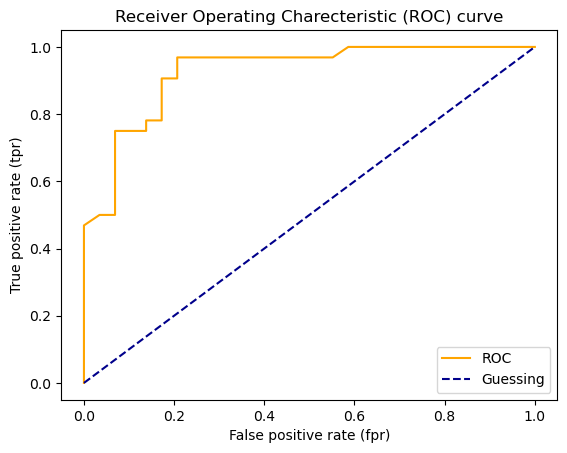

In [87]:
# Creates a function for plotting ROCC curves
import matplotlib.pyplot as plt

def plot_roc_curve(fpr, tpr):
    """
    Plots a ROC curve given the false positive rate (fpr)
    and true positive rate (tpr) of a model.
    """
    # Plot roc curve
    plt.plot(fpr, tpr, color="orange", label="ROC")
    # plot line with no predictive power (baseline)
    plt.plot([0, 1], [0, 1], color="darkblue", linestyle='--', label='Guessing')

    # Customize the plot
    plt.xlabel('False positive rate (fpr)')
    plt.ylabel('True positive rate (tpr)')
    plt.title('Receiver Operating Charecteristic (ROC) curve')
    plt.legend()
    plt.show()
plot_roc_curve(fpr, tpr)

In [88]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, y_probs_positive)

0.9256465517241379

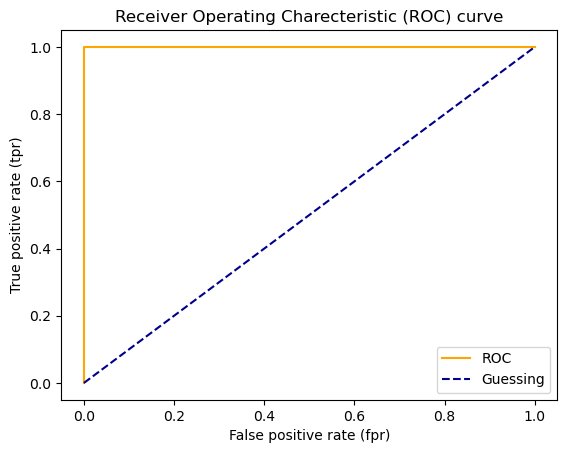

In [89]:
# plot perfect ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, y_test)
plot_roc_curve(fpr, tpr)

In [92]:
# perfect AUC score
roc_auc_score(y_test, y_test)

1.0

# 29

**Confusion Matrix**

* A confusion matrix is a quick way to compare the labels a model predicts and the actual labels it was supposed o predict.
* In essence, giving you an idea of where the model is getting confused.

In [94]:
from sklearn.metrics import confusion_matrix

y_preds = clf.predict(X_test)

confusion_matrix(y_test, y_preds)

array([[24,  5],
       [ 4, 28]])

In [95]:
# Visualize confusion matrix with pd.crosstab()
pd.crosstab(y_test,
           y_preds,
           rownames=['Actual Label'],
           colnames=['Predicted Labels'])

Predicted Labels,0,1
Actual Label,,
0,24,5
1,4,28


In [1]:
24+5+4+28

61

In [ ]:
len()